In [2]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

In [4]:
# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

In [5]:
def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y

## Create Own Model

## iPhone6S_I

In [6]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone6S/iPhone6S_I/"

    if(i==0):
        data = getData(folder_path + "calendar-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
        print(i)
        print(X.shape)
        print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
#(em_data.T).to_csv(f'/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_I.csv', header=False)
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_I.csv', header=False)

[0.015625 -0.0234375j 0.015625 -0.0078125j 0.0390625+0.0078125j ...
 0.03125  -0.0078125j 0.015625 -0.015625j  0.03125  -0.0078125j]
2048
79002
(2048, 79002)
[0.02281539 0.01194811 0.00464875 ... 0.00215009 0.00434015 0.0120582 ]
[0.015625 -0.0078125j 0.015625 -0.0078125j 0.       -0.0078125j ...
 0.0234375-0.015625j  0.       -0.0078125j 0.0078125-0.0078125j]
2048
83422
(2048, 83422)
[0.02261406 0.01221008 0.00356162 ... 0.00220496 0.00347677 0.01195692]
1
(20000, 2048)
(20000,)
[0.015625 -0.0234375j 0.015625 +0.j        0.015625 -0.015625j  ...
 0.015625 +0.0078125j 0.0078125-0.0234375j 0.015625 -0.0234375j]
2048
91947
(2048, 91947)
[0.02267564 0.01198972 0.00444621 ... 0.00256938 0.00477387 0.01187558]
2
(30000, 2048)
(30000,)
[0.0078125-0.03125j   0.0234375+0.0078125j 0.0234375-0.015625j  ...
 0.0078125-0.0234375j 0.0390625-0.0078125j 0.0390625-0.015625j ]
2048
91066
(2048, 91066)
[0.02257732 0.01187163 0.0045188  ... 0.00236705 0.0043952  0.01194121]
3
(40000, 2048)
(40000,)
[0.00

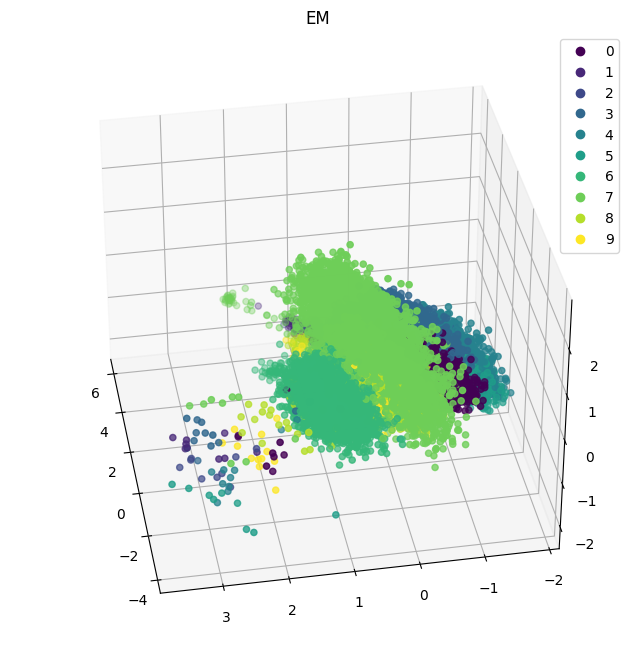

In [7]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_scatter.pdf')

Build a model for iPhone6S_I

In [8]:
data = pd.read_csv("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/i6S_I.csv",comment='#',  index_col=0, header=None, low_memory=False).T
data

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,labels
1,0.463071,0.722681,1.000000,1.000000,1.000000,0.912413,0.646761,0.528524,0.775984,0.668727,...,0.638502,0.633915,0.856580,1.000000,1.000000,1.000000,1.000000,1.000000,0.703457,0.0
2,0.924438,0.884964,0.038862,0.142171,0.396234,0.458375,0.156514,0.321213,0.452904,0.360334,...,0.324044,0.234160,0.235185,0.107884,0.146714,0.177919,0.281123,0.188798,0.890142,0.0
3,0.926026,0.868918,0.015123,0.050698,0.192157,0.056366,0.234835,0.139555,0.016052,0.054474,...,0.531453,0.300818,0.092450,0.316055,0.497215,0.575684,0.341347,0.107704,0.866179,0.0
4,0.916945,0.880422,0.079554,0.280917,0.277394,0.355180,0.345189,0.123624,0.072745,0.098530,...,0.385184,0.057337,0.279117,0.187302,0.149673,0.129864,0.039026,0.121298,0.847005,0.0
5,0.940794,0.910733,0.028609,0.109286,0.284765,0.217448,0.187732,0.403821,0.317301,0.193704,...,0.036649,0.155294,0.137138,0.433101,0.254334,0.037673,0.029429,0.069397,0.892828,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,0.967245,0.896364,0.080892,0.186218,0.250236,0.165038,0.273153,0.455276,0.207859,0.233938,...,0.276449,0.385829,0.282973,0.325023,0.215741,0.160618,0.238299,0.162194,0.954898,9.0
99997,0.945687,0.897497,0.075034,0.126348,0.207570,0.068482,0.072415,0.235145,0.330629,0.328212,...,0.298178,0.141674,0.059589,0.145063,0.158856,0.032660,0.022960,0.050351,0.877638,9.0
99998,0.938972,0.859181,0.088384,0.097098,0.172215,0.353346,0.388891,0.285193,0.197425,0.060720,...,0.338581,0.097499,0.365021,0.341663,0.330468,0.304430,0.165421,0.062330,0.912393,9.0
99999,0.965864,0.943280,0.068404,0.101047,0.262941,0.263712,0.115950,0.129199,0.164493,0.258006,...,0.295970,0.623807,0.579244,0.060007,0.398035,0.182027,0.138627,0.114184,0.897979,9.0


In [9]:
Y = labels = data['labels']
X = data = data.drop(columns=['labels'])

In [7]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

2023-02-06 12:16:25.408765: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [9]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

mtd i
dataset with one press and store it as transpose of csv

In [10]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPHONE6S_I_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=25, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/25
2532/2532 [==============================] - 29s 11ms/step - loss: 2.2409 - accuracy: 0.2496 - val_loss: 2.1218 - val_accuracy: 0.3899
Epoch 2/25
2532/2532 [==============================] - 30s 12ms/step - loss: 1.7121 - accuracy: 0.5562 - val_loss: 1.2437 - val_accuracy: 0.7111
Epoch 3/25
2532/2532 [==============================] - 28s 11ms/step - loss: 0.8967 - accuracy: 0.7909 - val_loss: 0.7132 - val_accuracy: 0.7467
Epoch 4/25
2532/2532 [==============================] - 26s 10ms/step - loss: 0.4992 - accuracy: 0.8823 - val_loss: 0.3777 - val_accuracy: 0.9144
Epoch 5/25
2532/2532 [==============================] - 26s 10ms/step - loss: 0.2977 - accuracy: 0.9422 - val_loss: 0.2295 - val_accuracy: 0.9553
Epoch 6/25
2532/2532 [==============================] - 32s 13ms/step - loss: 0.1818 - accuracy: 0.9702 - val_loss: 0.1522 - val_accuracy: 0.9704
Epoch 7/25
2532/2532 [==============================] - 24s 10ms/step - loss: 0.1235 - accuracy: 0.9817 - val_loss: 0.1049 -

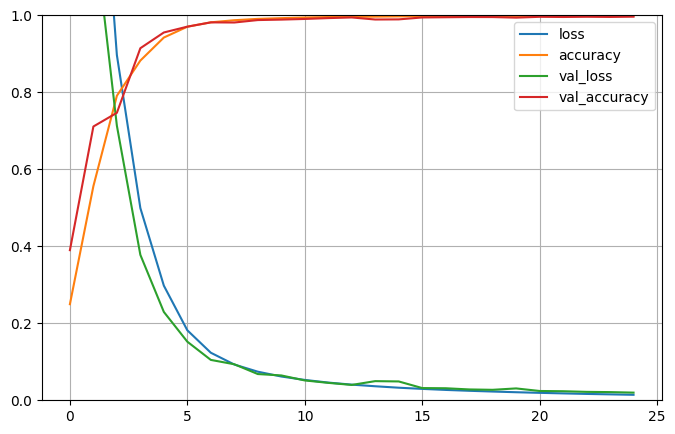

<Figure size 640x480 with 0 Axes>

In [11]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/accuracy_and_loss_iPhone6S_I.pdf')

In [12]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPHONE6S_I_model.h5")

In [13]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 2s 5ms/step - loss: 0.0282 - accuracy: 0.9951
test loss, test acc: [0.02815467305481434, 0.9951000213623047]


In [14]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 2s 5ms/step
[0 6 5 ... 5 5 6]
0


In [15]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1009    2    0    0    0    0    0    0    0    0]
 [   0 1009    0    0    0    0    1    0    0    0]
 [   1    1  989    1    0    1    0    0    0    0]
 [   2    1    1  932    0    0    0    2    1    0]
 [   0    0    0    2 1034    4    3    0    0    0]
 [   0    0    2    1    2 1022    0    0    0    0]
 [   0    0    0    0    0    0  997    1    0    1]
 [   2    0    0    1    0    0    0  967    1    3]
 [   0    0    0    0    0    0    4    1  997    1]
 [   0    1    0    0    0    0    1    3    1  995]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1010
           2       1.00      1.00      1.00       993
           3       0.99      0.99      0.99       939
           4       1.00      0.99      0.99      1043
           5       1.00      1.00      1.00      1027
           6       0.99      1.00      0.99       999
           7       0.99      0.99   

Test Accuracy:0.9951


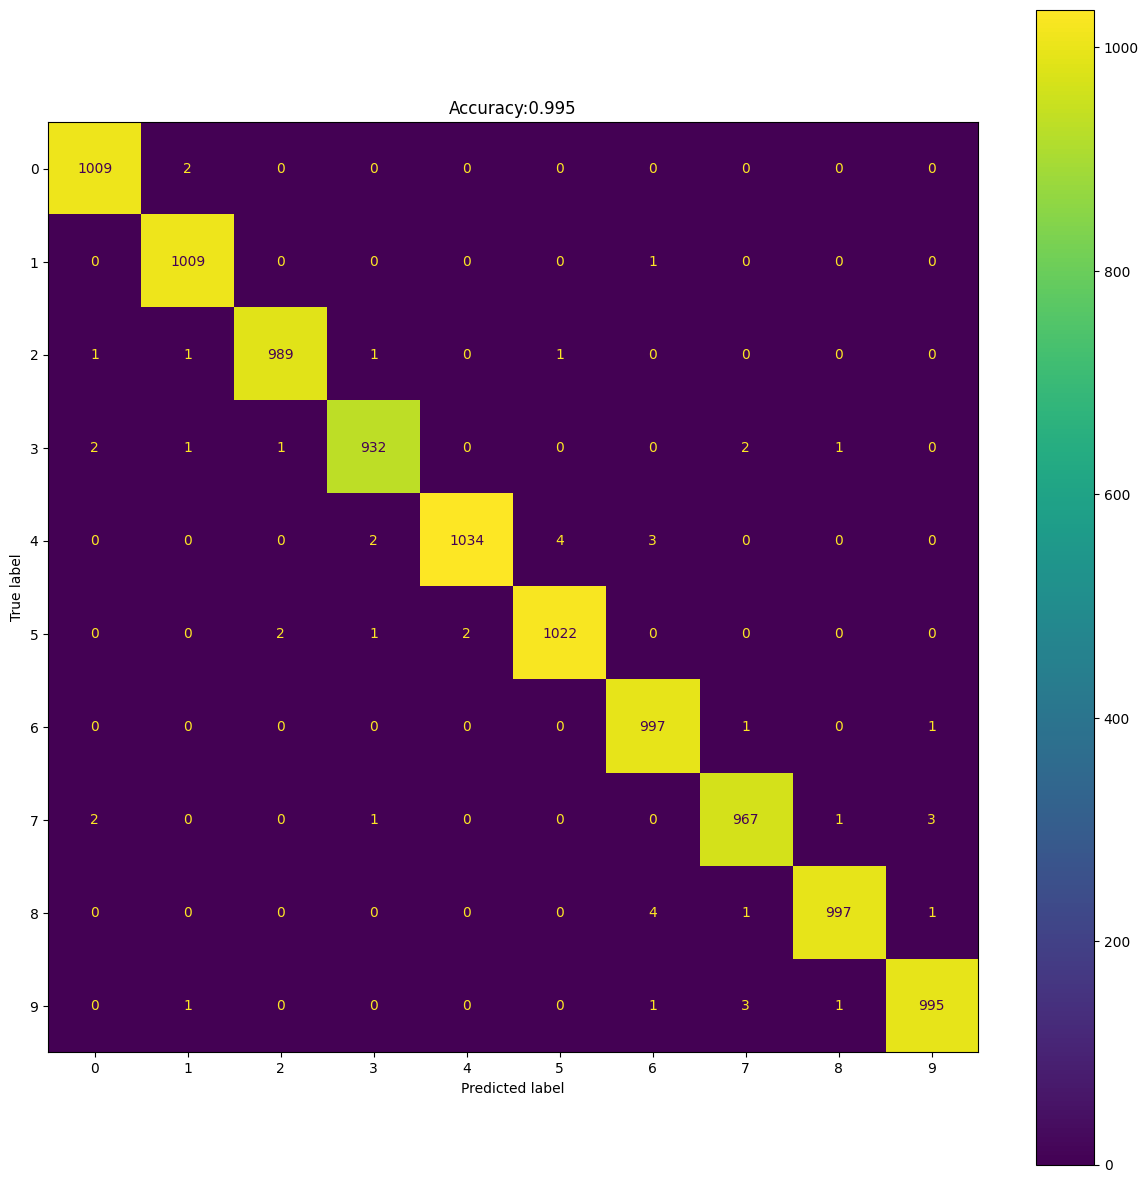

In [16]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone6S/iPhone6S_I_confusion_matrix.pdf')

## iPhone6S_I
Collected in Vavuniya, SriLanka

Create an Own model for different dataset for the same mobile phone in two different location

In [15]:
# reading a data for class  label 0
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM Signals based on the location/Iphone 6S_Vavuniya,Sri Lanka/calender-app.cfile")
print(np.array(data))
X, Y = create_dataset(data, 0)

print(X.shape)
print(Y.shape)

[0.       -0.015625j  0.015625 -0.015625j  0.015625 -0.0078125j ...
 0.015625 -0.015625j  0.015625 -0.0078125j 0.0078125-0.015625j ]
2048
122704
(2048, 122704)
[0.0218261  0.01132615 0.00442661 ... 0.00204373 0.00421774 0.01136749]
(9000, 2048)
(9000,)


In [16]:
# reading a data for class  label 1
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM Signals based on the location/Iphone 6S_Vavuniya,Sri Lanka/camera-photo.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 1)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.0234375-0.0234375j 0.0078125-0.0078125j 0.015625 -0.0234375j ...
 0.015625 -0.0234375j 0.0234375-0.0078125j 0.015625 -0.0078125j]
2048
140803
(2048, 140803)
[0.0218406  0.01136429 0.00388658 ... 0.00260849 0.00458287 0.01128596]
(18000, 2048)
(18000,)


In [17]:
# reading a data for class  label 2
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM Signals based on the location/Iphone 6S_Vavuniya,Sri Lanka/camera-video.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 2)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.015625 -0.0078125j 0.0234375-0.0078125j 0.015625 -0.015625j  ...
 0.0234375-0.0078125j 0.       -0.0078125j 0.015625 -0.0078125j]
2048
145922
(2048, 145922)
[0.0218599  0.01145804 0.00346691 ... 0.00188147 0.00360464 0.01139659]
(27000, 2048)
(27000,)


In [18]:
# reading a data for class  label 3
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM Signals based on the location/Iphone 6S_Vavuniya,Sri Lanka/email-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 3)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.0234375-0.0234375j 0.0234375+0.j        0.0078125-0.0078125j ...
 0.015625 -0.015625j  0.015625 -0.015625j  0.0078125-0.015625j ]
2048
6213
(2048, 6213)
[0.02158113 0.01134865 0.00426469 ... 0.00237068 0.00441376 0.01114306]
(33213, 2048)
(36000,)


In [19]:
# reading a data for class  label 4
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM Signals based on the location/Iphone 6S_Vavuniya,Sri Lanka/gallery-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 4)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.015625 -0.0234375j 0.015625 -0.015625j  0.0078125+0.j        ...
 0.0078125-0.0078125j 0.015625 -0.0078125j 0.0234375-0.0078125j]
2048
89733
(2048, 89733)
[0.02159475 0.01139939 0.0047457  ... 0.00213307 0.00417168 0.01119133]
(42213, 2048)
(45000,)


In [20]:
# reading a data for class  label 6
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM Signals based on the location/Iphone 6S_Vavuniya,Sri Lanka/idle.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 6)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.       -0.015625j  0.0234375-0.015625j  0.0078125-0.015625j  ...
 0.015625 -0.0234375j 0.03125  +0.0078125j 0.03125  -0.03125j  ]
2048
137288
(2048, 137288)
[0.03383591 0.01899699 0.00625307 ... 0.00704486 0.00587317 0.01897703]
(51213, 2048)
(54000,)


Create a .csv dataset 

In [21]:
# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'Y', Y)

# save to csv file
(em_data).to_csv(f'/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM Signals based on the location/Iphone 6S_Vavuniya,Sri Lanka/i6S_I_vavuniya.csv', header=False)

ValueError: Length of values (54000) does not match length of index (51213)